<a href="https://colab.research.google.com/github/PuChan-HCI/myweb/blob/main/MediaSystem/ImageProcessing01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 画像のアップロード (Upload your image)

In [ ]:
# from google.colab import files
# file_name = files.upload()

Saving woman.jpg to woman.jpg


# アップロードしたファイル名を取得 (Get the file name)

In [ ]:
# file_name = next(iter(uploaded_file))
# print(file_name)

woman.jpg


# URLから画像を入手 (Get an image from a url)

Note: In order to read an image from the github, you need to modify the url.

[Original URL] https://github.com/PuChan-HCI/myweb/blob/main/MediaSystem/woman.jpg (It's not working)

[Modified URL] https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/woman.jpg

In [22]:
import urllib.request
url = 'https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/woman.jpg'
file_name = 'woman.jpg'
urllib.request.urlretrieve(url, file_name)

('woman.jpg', <http.client.HTTPMessage at 0x7d6496ac3760>)

# 画像を表示 (Show the image)
*You need to covert the color order.*

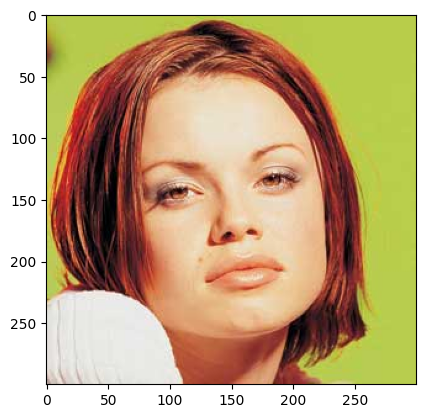

In [25]:
import cv2
from matplotlib import pyplot as plt

orig = cv2.imread('woman.jpg')
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(src)

# 画像標本化 (Image Sampling)

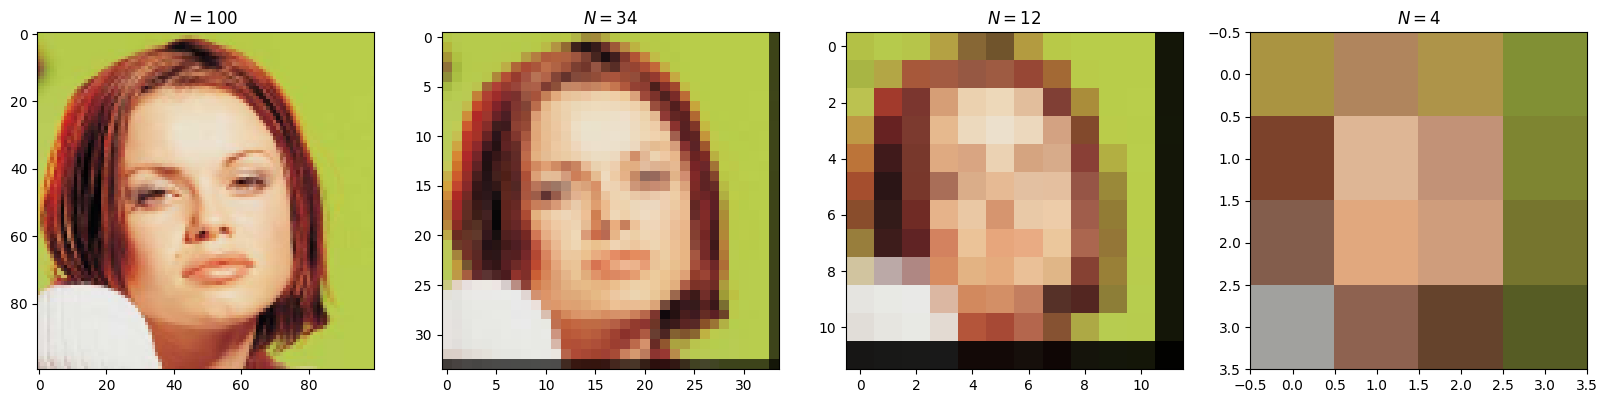

In [26]:
import numpy as np
from skimage.io import imshow, imread
from skimage.transform import downscale_local_mean

factors = 3**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for factor, ax in zip(factors, axis):
    image = downscale_local_mean(src, factors=(factor, factor, 1)).astype(int)
    ax.imshow(image)
    ax.set_title('$N={}$'.format(image.shape[0]))

# 画像量子化 (Image Quantization)

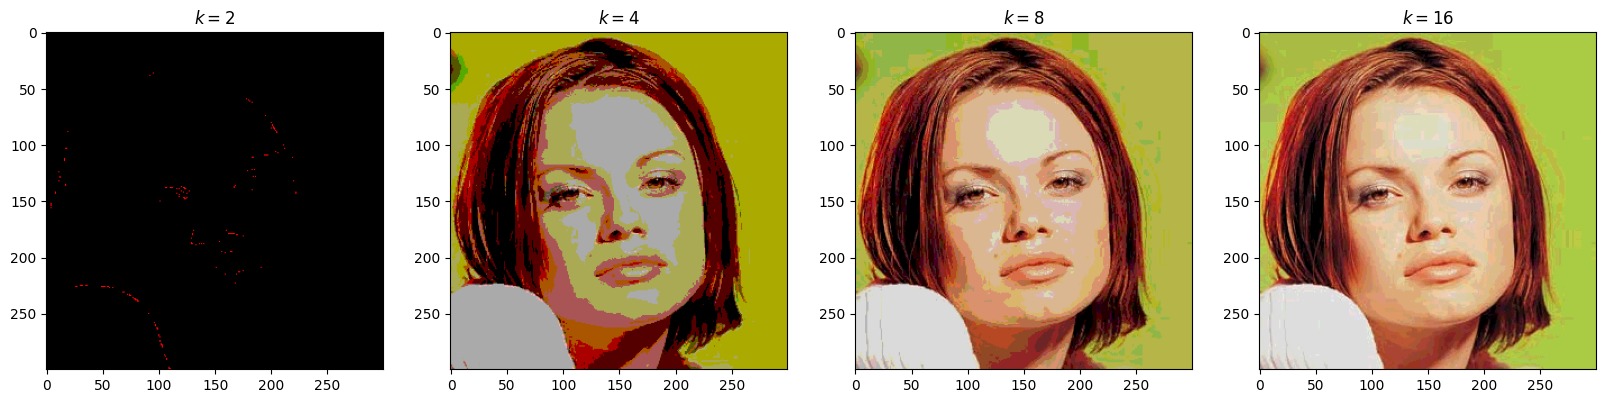

In [27]:
factors = 2**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, src.max(), k)
    image = np.digitize(src, bins)
    image = (np.vectorize(bins.tolist().__getitem__)(image-1).astype(int))
    ax.imshow(image)
    ax.set_title('$k = {}$'.format(k))

# カラー（R, G, B）の分布 (RGB Color Distribution)

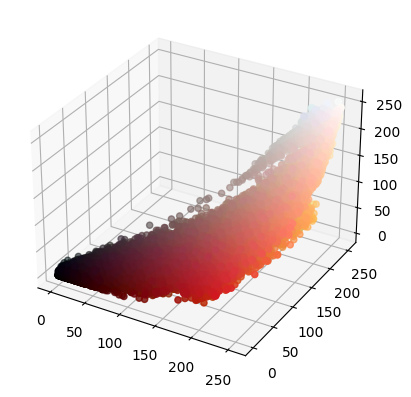

In [28]:
from mpl_toolkits import mplot3d
from PIL import Image

# im = Image.open("woman.jpg")
# px = im.load()

# height, width, number of channels in image
dimensions = src.shape
height = src.shape[0]
width = src.shape[1]
channels = src.shape[2]
ax = plt.axes(projection = '3d')
x = []
y = []
z = []
c = []

for row in range(0,height):
    for col in range(0, width):
      pix = src[col,row]
      newCol = (pix[0] / 255, pix[1] / 255, pix[2] / 255)
      x.append(pix[0])
      y.append(pix[1])
      z.append(pix[2])
      c.append(newCol)

ax.scatter(x,y,z, c = c)
plt.show()